**TASK - 2 : Unsupervised clustering**

Using K_means to predict optimum number of clusters for given iris dataset

In [1]:
# IMPORTING THE REQUIRED MODULES
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
data_iris=pd.read_csv("/content/Iris.csv")                                                                 # Extracting data
print("\nFirst five rows\n",data_iris.head())                                                            # print first five rows of collected data

print("\nLast five rows\n",data_iris.tail())                                                             # print last five rows of collected data


First five rows
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Last five rows
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virgin

In [3]:
data_iris.isnull().sum()       # Checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
print(data_iris.Species.nunique())                                                                      # TO find number of classes
print(data_iris.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64



Dot Plot


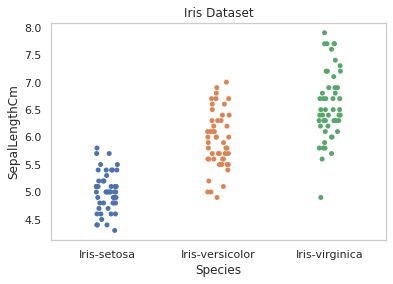


Count Plot


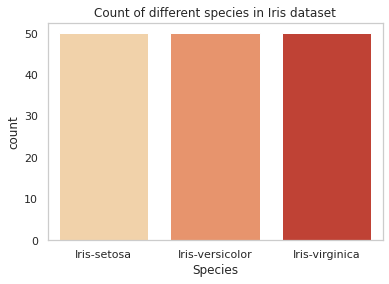

In [5]:
# DATA VISUALIZATION

print("\nDot Plot")

sns.set(style = 'whitegrid')                                                                            # Using Dot Plot
dataset_iris = sns.load_dataset('iris')
axis = sns.stripplot(x ='Species',y = 'SepalLengthCm',data = data_iris)

plt.title('Iris Dataset')
plt.grid(False)
plt.show()


print("\nCount Plot")

sns.countplot(x='Species', data=data_iris, palette="OrRd")                                                   # Using Count Plot

plt.title("Count of different species in Iris dataset")
plt.grid(False)
plt.show()

In [6]:
# FINDING OPTIMUM NUMBER OF CLUSTERS FOR K-MEANS(WCSS)
x = data_iris.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):                                                                                               # driving code
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)                                                                                    # Changes  the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    
    print("k: {} ; wcss: {}".format(i,kmeans.inertia_))      

k: 1 ; wcss: 281831.5446666667
k: 2 ; wcss: 70581.38080000003
k: 3 ; wcss: 31320.71120000001
k: 4 ; wcss: 17758.792503556186
k: 5 ; wcss: 11468.96874702381
k: 6 ; wcss: 7921.8634730769245
k: 7 ; wcss: 5911.632365518541
k: 8 ; wcss: 4541.979023391813
k: 9 ; wcss: 3571.9110955882347
k: 10 ; wcss: 2943.933100840336


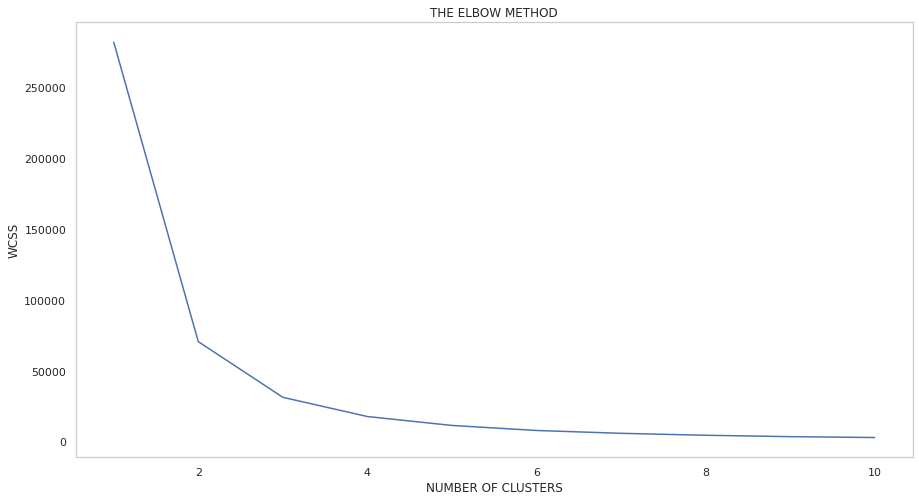

In [7]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.grid(False)
plt.show()

In [8]:
#APPLYING K Means CLASSFIER 

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)                   # applying K-Means to the dataset 

y_kmeans = kmeans.fit_predict(x)                    


Without Plotting the Centroids of each species


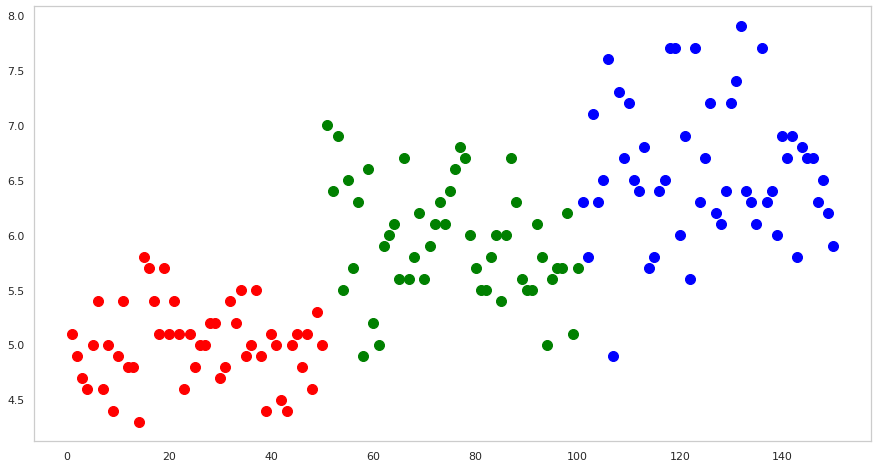


 After Plotting the Centroids of all species (highlighted in red)


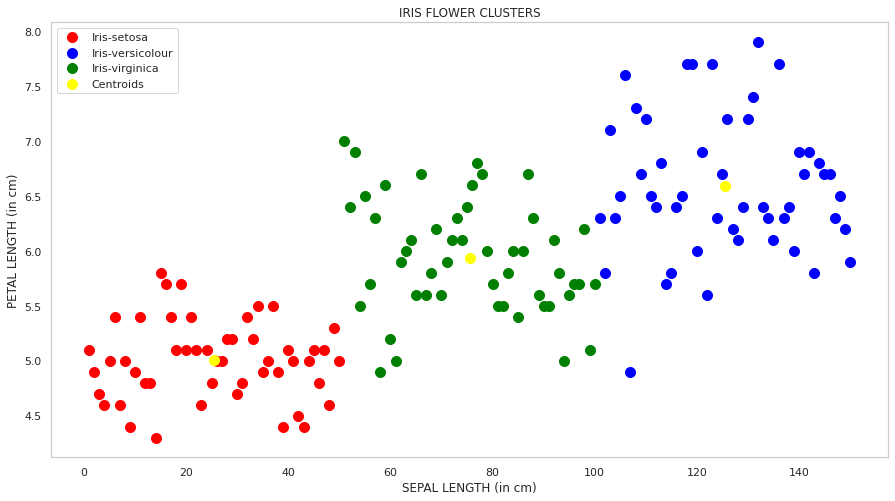

In [9]:
# VISUALIZING THE CLUSTERS

print("\nWithout Plotting the Centroids of each species")

plt.figure(figsize=(15,8))                                                                                          # providing size of graph 

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')                                 # dot plot of setosa
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')                              # dot plot of versicolour
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')                               # dot plot of virginica

plt.grid(False)                                                                                                     # to remove gridlines
plt.show()

##Plotting the centroids of the clusters
print("\n After Plotting the Centroids of all species (highlighted in red)")
plt.figure(figsize=(15,8))

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')                                 # dot plot of setosa
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')                              # dot plot of versicolour
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')                               # dot plot of virginica

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')              # plotting dots on graph

plt.title('IRIS FLOWER CLUSTERS')                                                                                   # title of graph 
plt.xlabel('SEPAL LENGTH (in cm)')                                                                                  # x axis
plt.ylabel('PETAL LENGTH (in cm)')                                                                                  # y axis
plt.legend()                                                                                                        # legend key

plt.grid(False)                                                                                                     # to remove gridlines
plt.show()

**THE** **END**